# 유방암 진단 데이터 실습
load_breast_cancer 명령은 유방암(breast cancer) 진단 데이터를 제공한다. 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지를 판별한다.

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


C:\Users\aonek_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


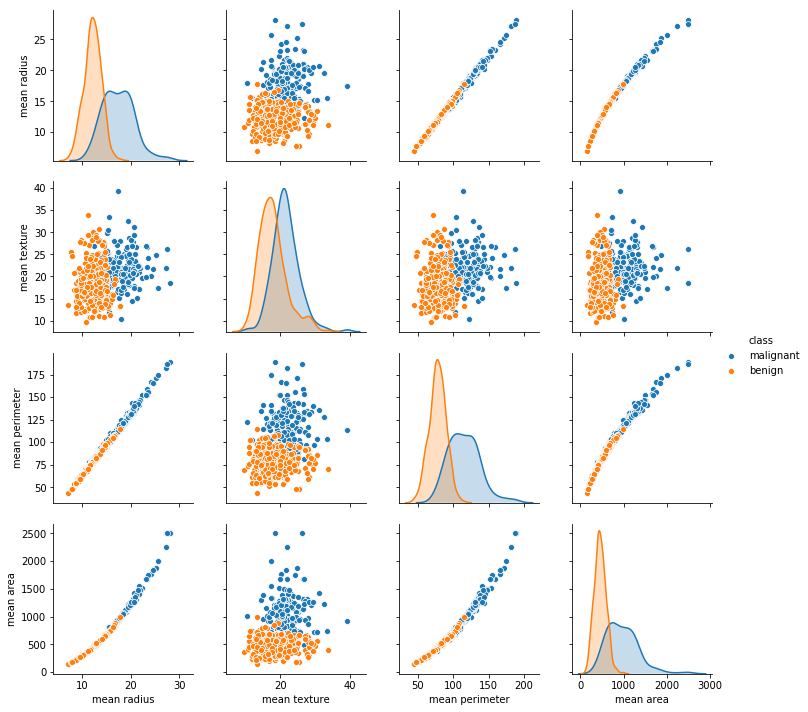

In [3]:
sns.pairplot(vars=["mean radius", "mean texture", "mean perimeter", "mean area"], 
             hue="class", data=df)
plt.show()

### import

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

### Data load
유방암 데이터를 로드한다.  
train data와 test data를 분리한다.  

In [5]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

### 실습 : 로지스틱 모형

1. 로지스틱 모형을 생성한다.
2. 모형의 정확도를 test 데이터를 사용하여 확인한다.

In [ ]:
# TODO

## Regularization:

- overfitting을 방지하자.
- L1 - 중요한 변수만을 남긴다.
- L2 - 기본값. 중요하지 않은 변수의 weight값을 0에 가깝게 규제한다.

> regularization 규제강도를 조정하는 C 매개변수가 중요하다.
   - C의 값을 감소시키면 규제의 강도가 증가한다.
   - lower C => 규제의 강도가 커진다. weight값이 0에 가깝게 조정된다. 과소적합된다.
   - higher C => 규제의 강도가 낮아진다. 모든 data point를 최대한 분류하도록 조정된다. 과대적합된다.

### 실습 : Regularization

1. C=100 으로 변경 해서 모형을 평가해 보자.
2. C=0.01 로 변경해서 모형을 평가해 보자.

In [ ]:
#TODO